In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mp

In [19]:
datos = pd.read_excel(open('sample_data/Base_de_datos_no_supervisado.xlsx', 'rb'), sheet_name='Datos')
datos.head(5)

,Banco,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_Op/Activos,ROA,ROE,Calidad,Utilidad/ingresos
0,BANCAMÍA S. A.,19.41,166.8,195.867789,80.821987,10.972821,1.814898,8.992558,6.033077,5.610798
1,BANCIEN S.A,12.54,179.5,86.215431,71.706366,3.665542,0.601593,6.624493,4.489339,2.805774
2,BANCO AGRARIO,17.06,268.0,91.778767,52.050292,2.545191,1.954315,28.727868,6.654020,12.909415
3,BANCO AV VILLAS S. A.,10.92,114.0,97.070146,74.505601,3.250669,-0.102210,-1.205538,3.595970,-0.747737
4,BANCO BTG PACTUAL COLOMBIA S. A.,100.38,254.9,145.972416,39.328614,5.066361,4.045015,7.155583,0.000000,17.713658


# Descripción de los datos

In [31]:
datos.shape

(29, 10)

In [38]:
AtributosNumericos = datos.columns
AtributosNumericos = AtributosNumericos[1:]
print(AtributosNumericos)

Index(['Solvencia ', 'IRL', 'Cartera/Depósitos', 'Cartera/Activos',
       'Gast_Op/Activos', 'ROA', 'ROE', 'Calidad', 'Utilidad/ingresos'],
      dtype='object')


In [39]:
Estadisticas = pd.DataFrame(datos)
print(Estadisticas.describe())

       Solvencia           IRL  Cartera/Depósitos  Cartera/Activos  \
count   29.000000    29.000000          29.000000        29.000000   
mean    21.831379   251.155172         122.808645        67.530552   
std     20.512589   196.624801          89.783202        19.777718   
min     10.450000   114.000000           1.803682         0.207770   
25%     12.880000   158.300000          91.778767        65.709502   
50%     16.300000   202.500000         107.199380        72.337612   
75%     18.100000   262.100000         123.093154        76.670117   
max    100.380000  1101.000000         552.858202        96.389689   

       Gast_Op/Activos        ROA        ROE    Calidad  Utilidad/ingresos  
count        29.000000  29.000000  29.000000  29.000000          29.000000  
mean          4.797220   0.050132   3.112703   4.908108          -2.413532  
std           3.985579   4.601513  19.516525   3.063646          24.000418  
min           0.901596 -21.399908 -75.649607   0.000000      

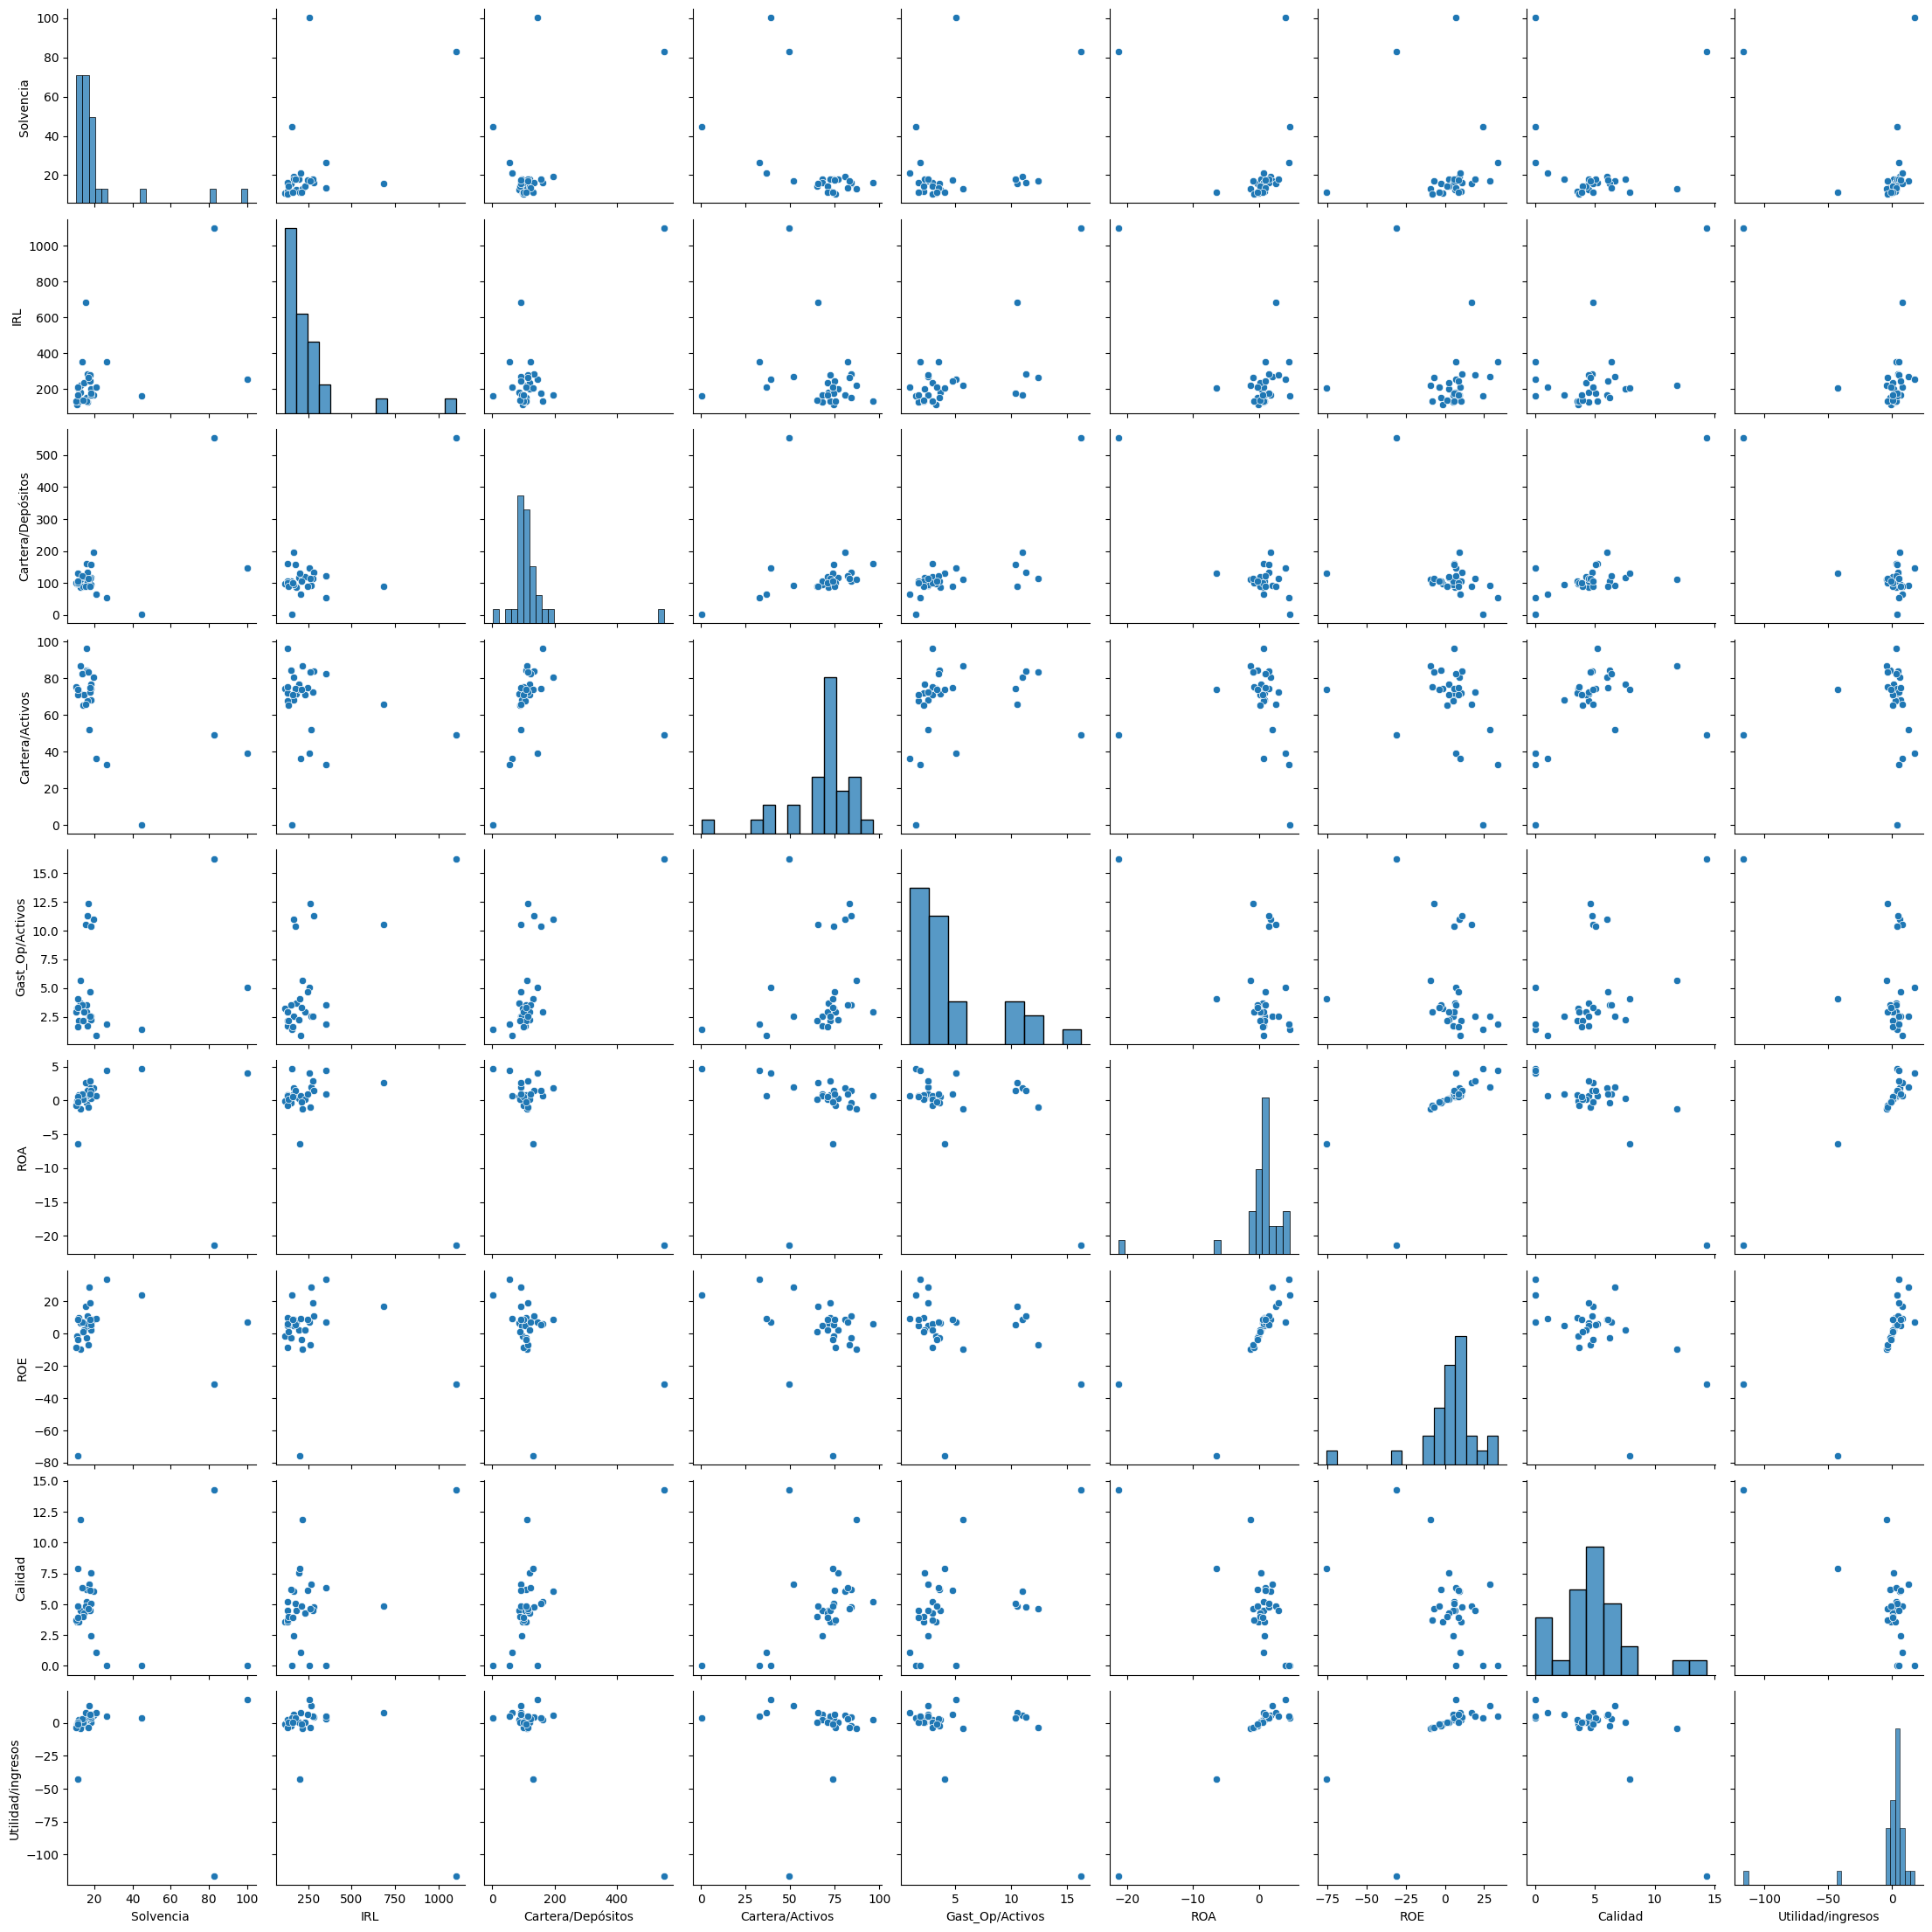

In [40]:
sns.pairplot(datos, kind="scatter")
plt.show()

<ipython-input-41-37c56fb7f2d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = datos.corr()
<ipython-input-41-37c56fb7f2d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(datos.corr(), cmap="YlGnBu", annot=True)


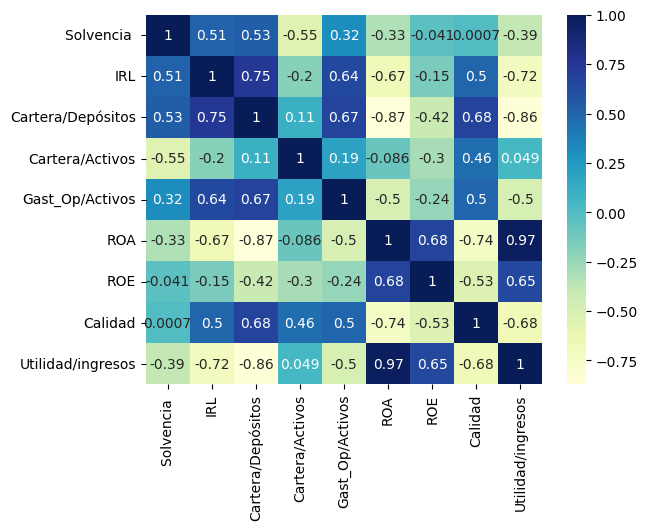

                   Solvencia        IRL  Cartera/Depósitos  Cartera/Activos  \
Solvencia            1.000000  0.510527           0.526306        -0.547351   
IRL                  0.510527  1.000000           0.746246        -0.197693   
Cartera/Depósitos    0.526306  0.746246           1.000000         0.105448   
Cartera/Activos     -0.547351 -0.197693           0.105448         1.000000   
Gast_Op/Activos      0.320062  0.642236           0.673693         0.192960   
ROA                 -0.328648 -0.673849          -0.871349        -0.085786   
ROE                 -0.040633 -0.153295          -0.420218        -0.296128   
Calidad              0.000695  0.500646           0.678999         0.455975   
Utilidad/ingresos   -0.392554 -0.716616          -0.856257         0.048802   

                   Gast_Op/Activos       ROA       ROE   Calidad  \
Solvencia                 0.320062 -0.328648 -0.040633  0.000695   
IRL                       0.642236 -0.673849 -0.153295  0.500646   
Carte

In [41]:
correlation_matrix = datos.corr()
dataplot = sns.heatmap(datos.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
mp.show()
print(correlation_matrix)

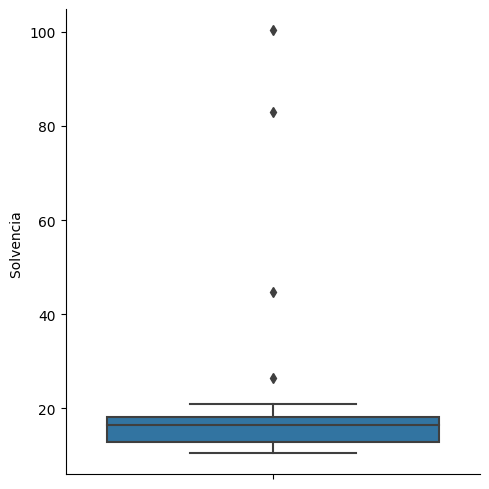

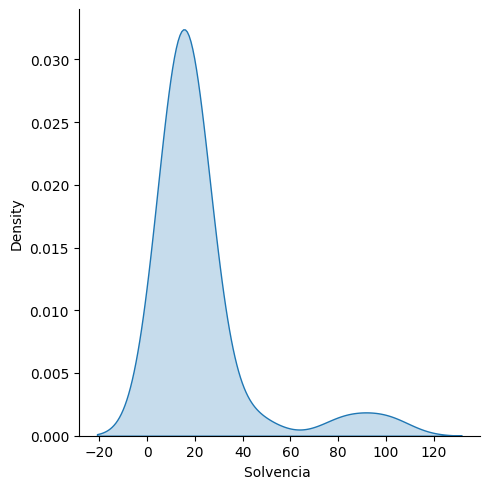

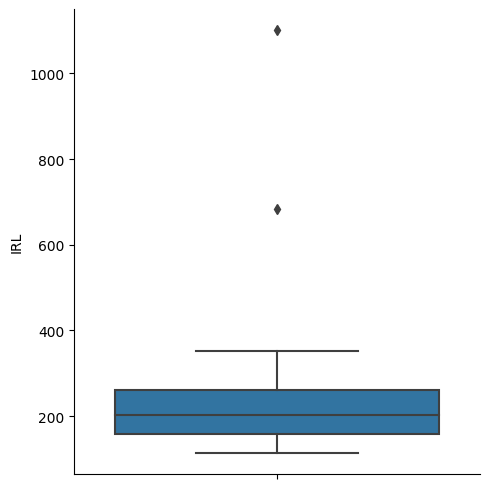

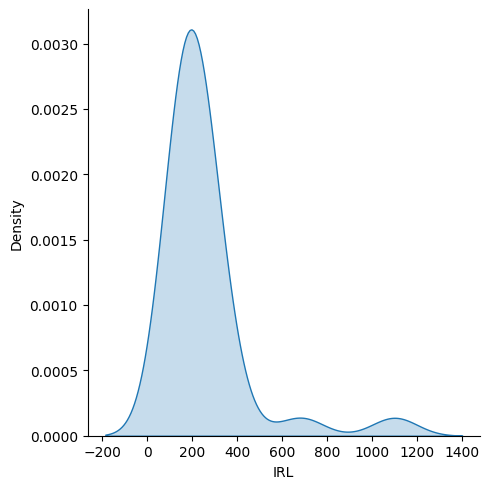

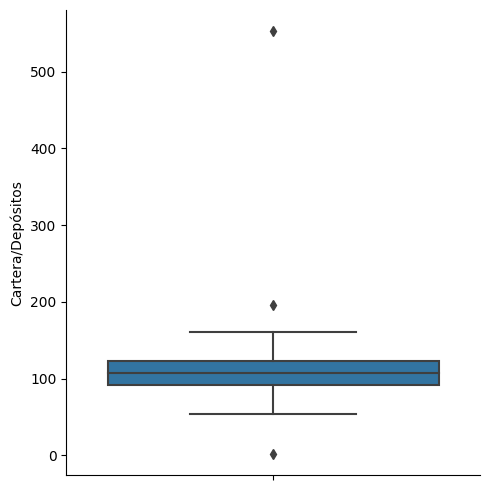

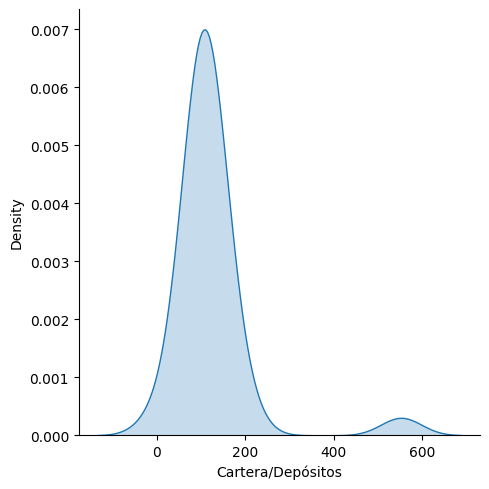

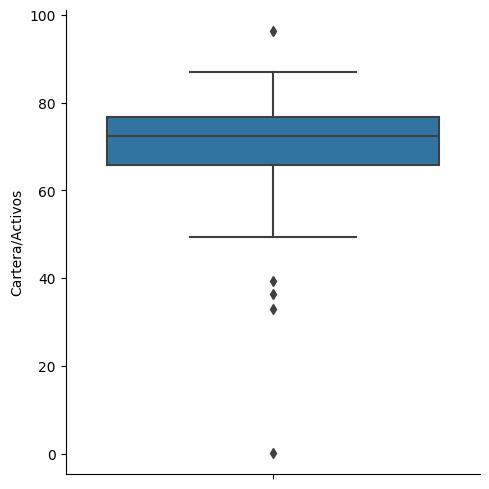

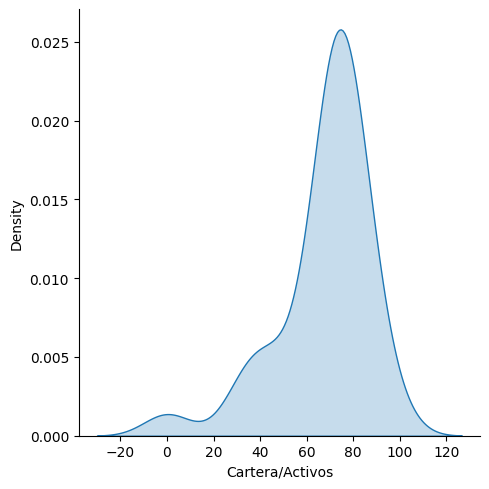

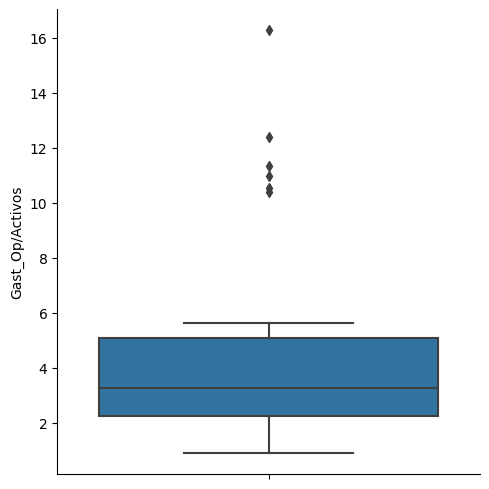

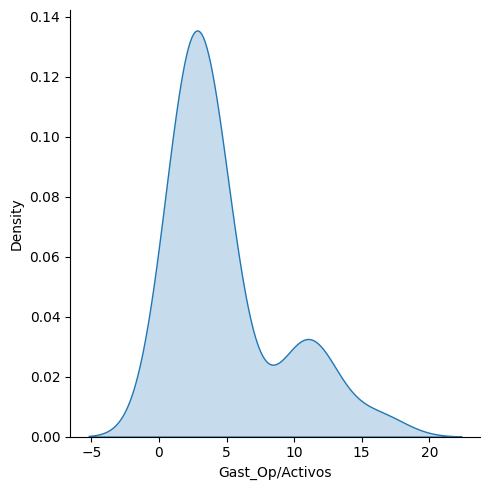

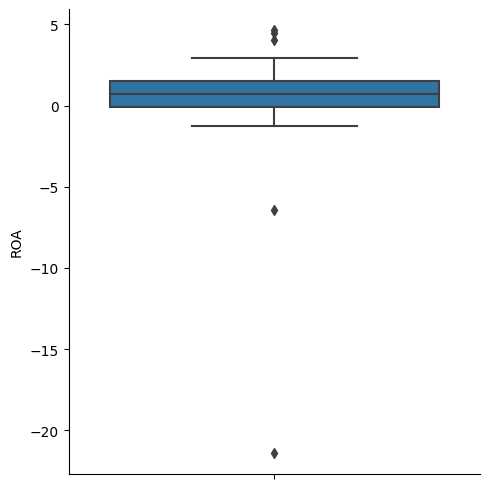

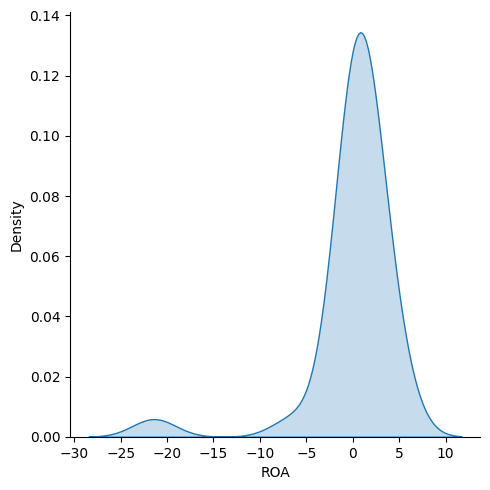

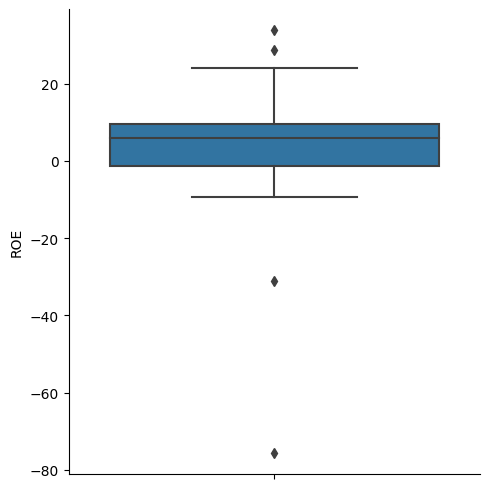

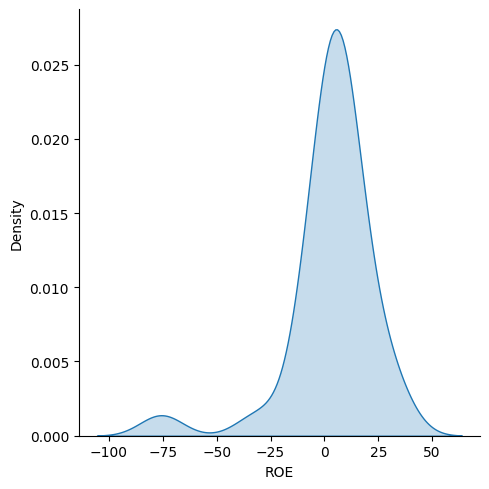

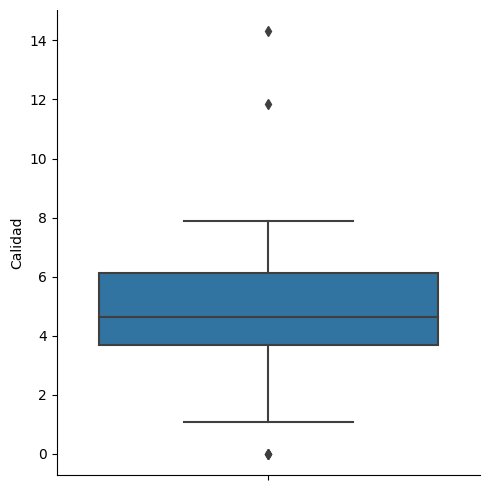

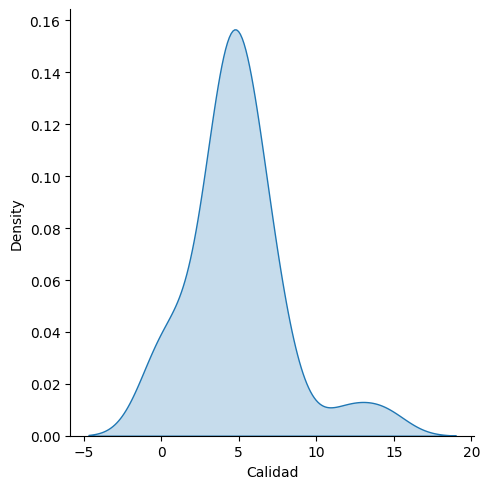

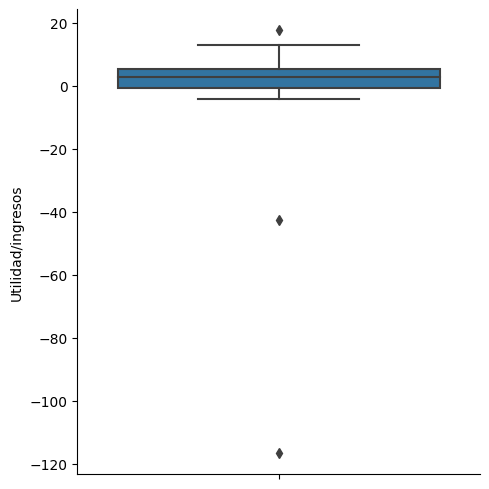

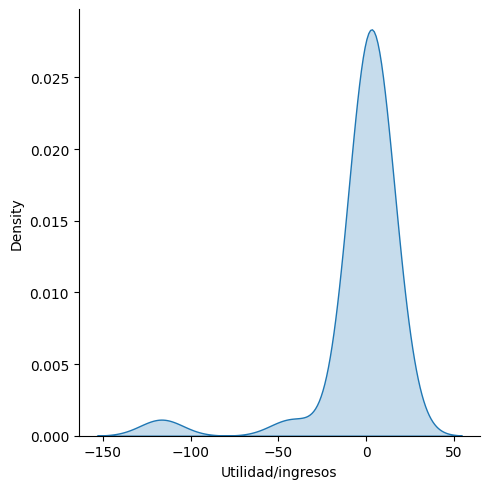

In [42]:
for i in AtributosNumericos:
  sns.catplot(data=datos, y=i, kind="box",margin_titles=True)
  sns.displot(datos, x=i, kind="kde",fill=True,common_norm=False)


Para hacer el análisis preliminar nos aproyamos de diagramas de cajas y bigotes, densidad, dispersión junto con el uso de estadísticas descriptivas y de correlación lineal entre las variables con lo que se llegó a las siguientes conclusiones:

> **Utilidad/ingresos vs. ROA:** Existe una correlación lineal positiva muy fuerte (0.97) entre la utilidad como proporción de los ingresos y el retorno de activos (ROA). Esto sugiere que a medida que el ROA aumenta, la empresa tiende a generar una mayor utilidad en relación con sus ingresos.

> **Cartera/Depósitos vs. Gast_Op/Activos:** Existe una correlación lineal negativa fuerte (-0.87) entre la relación Cartera/Depósitos y el gasto operativo como proporción de los activos. Esto sugiere que a medida que la proporción de cartera de préstamos con respecto a los depósitos aumenta, el gasto operativo como proporción de los activos tiende a disminuir significativamente.

> **Gast_Op/Activos:** La variabilidad en esta relación es moderada, y la media indica que, en promedio, las instituciones gastan aproximadamente el 4.80% de sus activos en gastos operativos.

> **ROA (Return on Assets) y ROE (Return on Equity):** Ambas variables tienen medias positivas, lo que indica que, en promedio, las instituciones son rentables en términos de activos y patrimonio. Sin embargo, la variabilidad en estas tasas es alta, y hay observaciones con rendimientos negativos, especialmente en ROE como lo es por ejemplo para el caso del banco Pichincha S.A.

Estas variables nos pueden ser útiles para calcular el riesgo de las instituciones financieras, ya que ofrecen una visión de diferentes aspectos de su salud financiera, como por ejemplo:

> **Solvencia:** Mide la capacidad de una institución financiera para cumplir con sus obligaciones financieras a medida que vencen. Un bajo nivel de solvencia podría indicar un mayor riesgo de incumplimiento. Esta variable es fundamental para evaluar el riesgo crediticio.

> **IRL (Ingresos / Recursos Líquidos):** Un IRL alto sugiere una mejor capacidad para generar ingresos con los recursos disponibles, lo que puede reducir el riesgo financiero.

> **Cartera/Depósitos y Cartera/Activos:** Estas relaciones son relevantes para evaluar el riesgo de concentración de activos y la calidad de la cartera de préstamos. Un alto ratio de Cartera/Depósitos puede indicar una dependencia significativa de los préstamos en relación con los depósitos, lo que podría aumentar el riesgo si los préstamos no son de alta calidad. Por otro lado, un bajo ratio de Cartera/Activos podría señalar una mayor diversificación de activos, lo que podría reducir el riesgo.

> **Gast_Op/Activos:** Esta variable proporciona información sobre la eficiencia operativa de la institución financiera. Un alto nivel de gastos operativos en relación con los activos podría indicar ineficiencias y aumentar el riesgo de rentabilidad.

En resumen, estas variables proporcionan una visión integral de la salud financiera de las instituciones financieras y son fundamentales para evaluar el riesgo en diferentes aspectos, como el riesgo crediticio, el riesgo operativo y el riesgo de rentabilidad.




